In [1]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
       BatchNorm2d-2           [-1, 32, 26, 26]              64
              ReLU-3           [-1, 32, 26, 26]               0
         AvgPool2d-4           [-1, 32, 13, 13]               0
            Conv2d-5           [-1, 32, 11, 11]           9,248
       BatchNorm2d-6           [-1, 32, 11, 11]              64
              ReLU-7           [-1, 32, 11, 11]               0
           Dropout-8           [-1, 32, 11, 11]               0
         MaxPool2d-9             [-1, 32, 6, 6]               0
           Conv2d-10             [-1, 16, 4, 4]           4,624
        AvgPool2d-11             [-1, 16, 1, 1]               0
           Linear-12                   [-1, 10]             170
Total params: 14,490
Trainable params: 14,490
Non-trainable params: 0
---------------------------------

Batch Size torch.Size([128, 1, 28, 28])


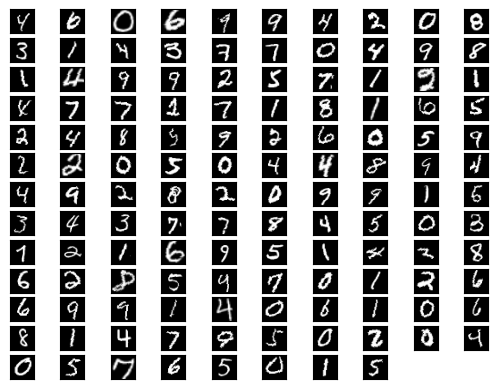

In [2]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2031 Batch_id=468 Accuracy=81.10: 100%|██████████| 469/469 [00:24<00:00, 19.26it/s]

[83.75823062637177, 94.0670424206467, 72.55790533736153, 78.95938672320992, 78.53474837384458, 77.67939494558199, 86.48191956742143, 83.3998403830806, 80.00341821910784, 73.49134308287107]


Test set: Average loss: 0.1572, Accuracy: 9529/10000 (95.29%)

[96.3265306122449, 98.59030837004406, 97.38372093023256, 91.1881188118812, 97.9633401221996, 93.72197309417041, 97.80793319415449, 94.74708171206225, 98.76796714579056, 86.1248761149653]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2006 Batch_id=468 Accuracy=94.98: 100%|██████████| 469/469 [00:24<00:00, 19.40it/s]

[96.48826608137769, 98.16078315040048, 93.37025847599865, 94.66644919262764, 94.74495035946595, 95.11160302527209, 96.28252788104089, 95.59457302474063, 92.73628439582977, 92.14994116658262]


Test set: Average loss: 0.0934, Accuracy: 9738/10000 (97.38%)

[99.6938775510204, 99.47136563876651, 94.96124031007753, 99.10891089108911, 96.13034623217924, 97.86995515695067, 96.4509394572025, 99.22178988326849, 93.63449691991786, 96.92765113974232]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0480 Batch_id=468 Accuracy=95.92: 100%|██████████| 469/469 [00:23<00:00, 19.80it/s]

[97.55191625865271, 98.33877187778107, 94.78012755958375, 95.41673462730387, 95.72064361520027, 95.9601549529607, 97.24569111186212, 96.0095770151636, 94.08648094342847, 93.81408640107581]


Test set: Average loss: 0.0607, Accuracy: 9834/10000 (98.34%)

[98.87755102040816, 99.38325991189427, 97.86821705426357, 98.91089108910892, 98.87983706720978, 99.10313901345292, 98.74739039665971, 98.44357976653697, 95.89322381930184, 97.22497522299307]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1179 Batch_id=468 Accuracy=96.40: 100%|██████████| 469/469 [00:23<00:00, 19.76it/s]

[97.67009961168327, 98.44259863541976, 95.66968781470293, 96.39536780296852, 95.80623074289628, 96.45821804095185, 97.60054072321729, 96.50438946528332, 94.65048709622288, 94.50327786182552]


Test set: Average loss: 0.0941, Accuracy: 9671/10000 (96.71%)

[98.16326530612245, 99.47136563876651, 96.60852713178295, 93.96039603960395, 98.57433808553971, 98.09417040358744, 99.26931106471815, 98.15175097276264, 90.04106776180699, 94.54905847373637]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1402 Batch_id=468 Accuracy=96.85: 100%|██████████| 469/469 [00:23<00:00, 19.65it/s]

[97.82204963700826, 98.5760901809552, 96.05572339711313, 96.88468439080084, 96.6963368709346, 96.91938756686959, 97.87090233186888, 97.06304868316042, 95.24867544009571, 95.07480248781309]


Test set: Average loss: 0.0567, Accuracy: 9814/10000 (98.14%)

[98.57142857142858, 99.73568281938327, 95.44573643410853, 98.91089108910892, 99.08350305498982, 98.09417040358744, 97.4947807933194, 99.12451361867704, 98.25462012320328, 96.53121902874133]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1584 Batch_id=468 Accuracy=97.10: 100%|██████████| 469/469 [00:23<00:00, 19.70it/s]

[98.31166638527773, 98.66508454464551, 96.10607586438402, 97.21089544935573, 96.83327627524821, 97.17764250138352, 97.85400473132815, 97.35035913806863, 95.35122201333105, 95.86485123550177]


Test set: Average loss: 0.0540, Accuracy: 9833/10000 (98.33%)

[98.77551020408163, 99.55947136563876, 98.93410852713178, 99.4059405940594, 97.5560081466395, 98.31838565022422, 98.43423799582463, 98.54085603112841, 96.09856262833677, 97.42319127849356]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0902 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:23<00:00, 20.11it/s]

[98.32854972142495, 98.67991693859389, 96.44175897952333, 97.45555374327189, 97.0386853817186, 97.5834716841911, 98.12436633997972, 97.15881883479649, 95.86395487950777, 95.66313666162381]


Test set: Average loss: 0.0565, Accuracy: 9828/10000 (98.28%)

[97.34693877551021, 99.47136563876651, 99.70930232558139, 99.5049504950495, 99.18533604887983, 98.20627802690582, 98.53862212943632, 97.27626459143968, 98.15195071868584, 95.24281466798811]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1499 Batch_id=468 Accuracy=97.43: 100%|██████████| 469/469 [00:23<00:00, 20.01it/s]

[98.64933310822218, 98.70958172649065, 96.62638469284995, 97.42293263741641, 97.26121191372818, 97.5834716841911, 98.34403514700912, 97.43016759776536, 96.05195693043925, 96.06656580937972]


Test set: Average loss: 0.0484, Accuracy: 9858/10000 (98.58%)

[99.28571428571429, 99.73568281938327, 99.03100775193798, 99.9009900990099, 97.9633401221996, 98.09417040358744, 98.74739039665971, 97.85992217898833, 96.61190965092402, 98.31516352824579]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0639 Batch_id=468 Accuracy=97.54: 100%|██████████| 469/469 [00:24<00:00, 19.35it/s]

[98.46361641060274, 98.99139721150993, 96.8949311849614, 97.60234871962159, 97.34679904142418, 97.67570558937464, 98.19195674214262, 97.55786113328013, 96.20577679029225, 96.26828038325769]


Test set: Average loss: 0.0468, Accuracy: 9847/10000 (98.47%)

[99.18367346938776, 99.20704845814979, 99.70930232558139, 99.5049504950495, 98.57433808553971, 97.86995515695067, 98.43423799582463, 97.47081712062257, 97.5359342915811, 97.02675916749257]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0437 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:24<00:00, 19.33it/s]

[98.64933310822218, 98.75407890833581, 96.97885196374622, 97.79807535475452, 97.56932557343376, 97.82327983766834, 98.3947279486313, 97.7972865123703, 96.39377884122372, 96.65489998319046]


Test set: Average loss: 0.0424, Accuracy: 9872/10000 (98.72%)

[98.77551020408163, 99.64757709251101, 99.51550387596899, 98.91089108910892, 99.18533604887983, 98.20627802690582, 98.74739039665971, 98.83268482490273, 98.66529774127311, 96.53121902874133]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0949 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:24<00:00, 19.36it/s]

[98.6662164443694, 99.0210619994067, 97.21383014434373, 97.76545424889905, 97.74049982882575, 97.65725880833794, 98.63129435620141, 97.92498004788509, 96.78687403862588, 96.7221381744831]


Test set: Average loss: 0.0499, Accuracy: 9842/10000 (98.42%)

[98.36734693877551, 99.73568281938327, 96.70542635658916, 98.7128712871287, 97.86150712830958, 99.66367713004485, 96.97286012526096, 99.12451361867704, 98.15195071868584, 98.81070366699703]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0296 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:23<00:00, 19.55it/s]

[98.63244977207496, 99.00622960545832, 97.31453507888553, 97.70021203718807, 97.38103389250257, 97.74949271352149, 98.44542075025346, 97.84517158818835, 96.71850965646898, 96.65489998319046]


Test set: Average loss: 0.0403, Accuracy: 9868/10000 (98.68%)

[99.59183673469387, 99.55947136563876, 98.83720930232558, 99.20792079207921, 98.4725050916497, 98.99103139013454, 98.22546972860125, 99.0272373540856, 97.02258726899385, 97.7205153617443]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0503 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:24<00:00, 19.22it/s]

[98.54803309133885, 98.94690002966479, 97.04598858677409, 97.73283314304355, 97.84320438206093, 97.84172661870504, 98.66508955728287, 97.92498004788509, 96.7356007520082, 96.57085224407463]


Test set: Average loss: 0.0454, Accuracy: 9853/10000 (98.53%)

[98.36734693877551, 99.64757709251101, 99.03100775193798, 99.4059405940594, 99.28716904276986, 98.87892376681614, 99.16492693110646, 98.73540856031128, 94.8665297741273, 97.7205153617443]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1012 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:24<00:00, 19.47it/s]

[98.75063312510552, 99.03589439335508, 97.49916079221215, 98.1569075191649, 97.87743923313934, 97.76793949455819, 98.5468063534978, 98.02075019952115, 96.7356007520082, 97.17599596570852]


Test set: Average loss: 0.0417, Accuracy: 9857/10000 (98.57%)

[98.26530612244898, 99.38325991189427, 98.83720930232558, 98.41584158415841, 96.84317718940937, 99.55156950672645, 98.74739039665971, 99.22178988326849, 97.1252566735113, 99.20713577799802]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0178 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:24<00:00, 19.24it/s]

[98.71686645281108, 99.08039157520024, 97.31453507888553, 98.05904420159844, 97.56932557343376, 97.87862018077846, 98.76647516052721, 97.78132482043097, 96.75269184754742, 97.04151958312322]


Test set: Average loss: 0.0371, Accuracy: 9882/10000 (98.82%)

[99.59183673469387, 99.64757709251101, 99.03100775193798, 99.60396039603961, 99.18533604887983, 98.54260089686099, 98.22546972860125, 99.22178988326849, 97.94661190965093, 97.02675916749257]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0263 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:24<00:00, 19.21it/s]

[99.0376498396083, 99.18421833283892, 98.00268546492111, 98.3363236013701, 98.3738445737761, 98.06308799114555, 98.80027036160865, 98.48363926576216, 97.45342676465562, 97.41132963523282]


Test set: Average loss: 0.0309, Accuracy: 9896/10000 (98.96%)

[99.48979591836735, 99.55947136563876, 99.12790697674419, 99.5049504950495, 99.38900203665987, 98.99103139013454, 98.64300626304802, 98.63813229571986, 98.15195071868584, 98.01783944499505]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0238 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:24<00:00, 19.40it/s]

[99.18959986493331, 99.16938593889054, 97.90198053037932, 98.4504974718643, 98.21978774392332, 98.28444936358606, 98.9861439675566, 98.13248204309657, 97.5901555289694, 97.57942511346445]


Test set: Average loss: 0.0319, Accuracy: 9899/10000 (98.99%)

[99.38775510204081, 99.64757709251101, 99.12790697674419, 99.60396039603961, 99.38900203665987, 99.32735426008968, 98.32985386221294, 98.73540856031128, 98.35728952772074, 97.9187314172448]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0765 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:24<00:00, 19.44it/s]

[99.17271652878608, 99.27321269652923, 98.03625377643505, 98.54836078943077, 98.3053748716193, 98.30289614462276, 98.96924636701588, 98.22825219473265, 97.57306443343018, 97.49537737434864]


Test set: Average loss: 0.0301, Accuracy: 9911/10000 (99.11%)

[99.48979591836735, 99.73568281938327, 99.03100775193798, 99.5049504950495, 99.4908350305499, 99.2152466367713, 98.74739039665971, 98.92996108949417, 98.4599589322382, 98.41427155599604]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0377 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:24<00:00, 19.35it/s]

[99.08829984804997, 99.24354790863245, 97.93554884189325, 98.61360300114174, 98.4936665525505, 98.46891717395314, 99.18891517404529, 98.5634477254589, 97.7268842932832, 97.47856782652546]


Test set: Average loss: 0.0303, Accuracy: 9906/10000 (99.06%)

[99.48979591836735, 99.73568281938327, 98.74031007751938, 99.5049504950495, 99.28716904276986, 99.10313901345292, 98.43423799582463, 98.92996108949417, 98.56262833675564, 98.71159563924678]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.1098 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:23<00:00, 19.59it/s]

[99.18959986493331, 99.18421833283892, 98.01946962067808, 98.48311857771978, 98.18555289284492, 98.61649142224682, 98.86786076377155, 98.59537110933759, 97.48760895573406, 97.62985375693394]


Test set: Average loss: 0.0298, Accuracy: 9906/10000 (99.06%)

[99.48979591836735, 99.73568281938327, 98.83720930232558, 99.4059405940594, 99.18533604887983, 98.99103139013454, 98.53862212943632, 98.83268482490273, 98.66529774127311, 98.81070366699703]
Adjusting learning rate of group 0 to 1.0000e-03.


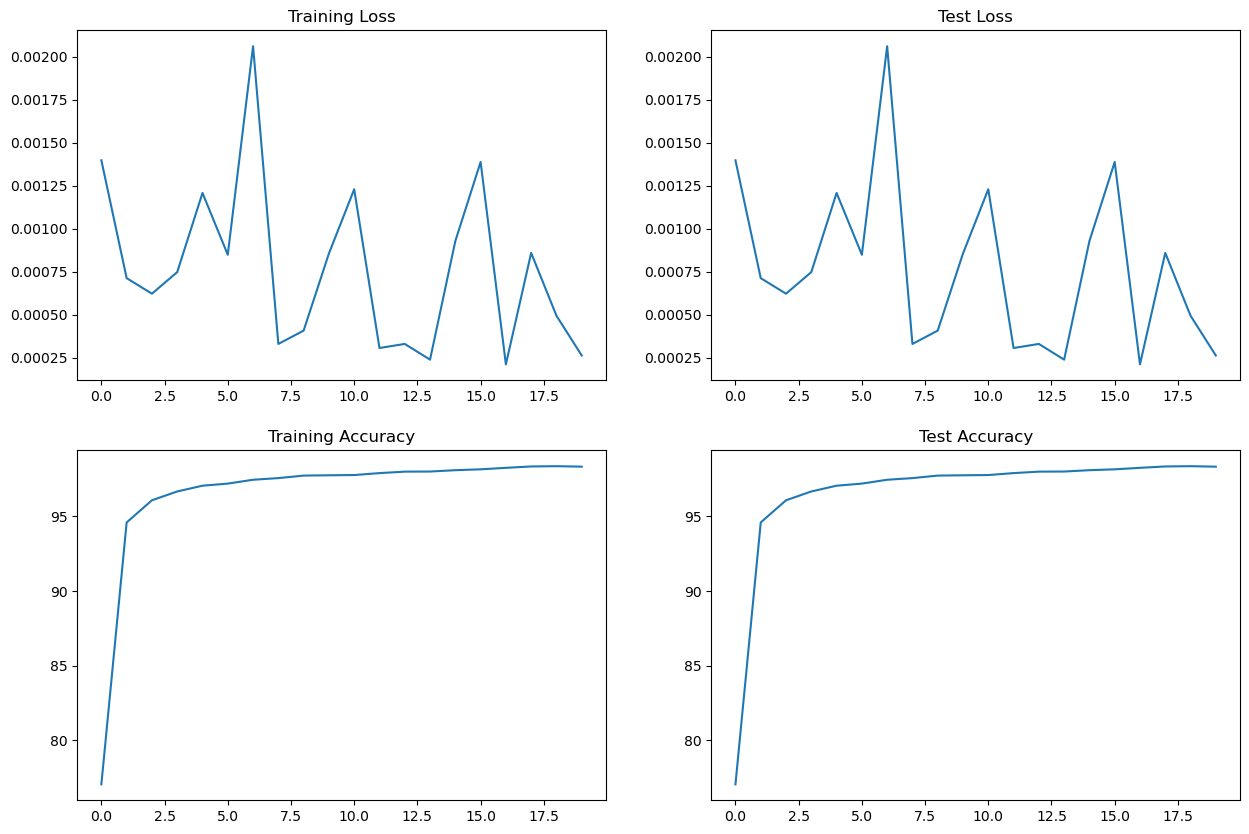

In [4]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)